<a href="https://colab.research.google.com/github/vidyaana22/portofolio-dataanalyst/blob/main/Analisis%20Genre%20Musik%20dan%20Faktor%20Keputusan%20Berlangganan%20Premium%20Aplikasi%20Musik%20pada%20Mahasiswa%20Teknologi%20Sains%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Klasifikasi

Dataset: https://drive.google.com/file/d/1n3T5r3y0kg9RbGIg1cfzAG9CJaYL_3a3/view?usp=sharing

In [ ]:
# Default Libraries
import pandas as pd
import numpy as np

# Library untuk Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Library untuk Modelling dan Evaluasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
import warnings
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
warnings.filterwarnings("ignore")

# Library untuk Association Rules Mining
from mlxtend.frequent_patterns import association_rules,apriori

In [ ]:
# Import Data
data = pd.read_csv("DatminUAS.csv")

## Penyesuaian Awal

In [ ]:
# Penghapusan Kolom yang Tidak Digunakan
data = data.drop(["Timestamp","Email Address", "Inisial", "Angkatan", "Nomor Telepon Shopeepay", "Terima kasih sudah mengisi!"],axis=1)
data

,Seberapa sering anda mendengarkan musik?,Aplikasi musik apa yang anda gunakan?,"Dari beragam aplikasi di atas, manakah aplikasi yang paling sering anda gunakan?",Apakah anda berlangganan premium pada aplikasi musik tersebut?,Genre musik apa yang anda sukai?,Apakah anda mendengarkan musik ketika belajar/mengerjakan tugas?,Perangkat apa yang anda gunakan ketika mendengarkan musik?,Berapa total perangkat yang anda miliki dan masih digunakan hingga saat ini?,Berapa lama anda menggunakan perangkat tersebut dalam sehari? (satuan jam),Berapa jumlah pemasukan anda dalam sebulan? (satuan rupiah),Berapa kisaran jumlah pengeluaran anda untuk keperluan hiburan? (satuan rupiah)
0,3,"Spotify, Youtube Music",Spotify,Tidak,"Jazz, Rock, J-Pop, Western, Techno",Tidak,Keduanya,2,6,1250000,50000
1,5,Spotify,Spotify,Ya,"Rock, Hip Hop, J-Pop",Ya,Keduanya,4,6,2000000,250000
2,4,Spotify,Spotify,Tidak,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae",Ya,Laptop/Komputer,2,10,1000000,200000
3,5,Spotify,Spotify,Ya,"K-Pop, J-Pop, Western",Ya,Keduanya,2,8,1500000,500000
4,2,Youtube Music,Youtube Music,Tidak,"Jazz, RnB, Klasik, Western",Ya,Laptop/Komputer,2,8,1600000,200000
...,...,...,...,...,...,...,...,...,...,...,...
76,5,Spotify,Spotify,Ya,"Pop, Jazz, Klasik, Hip Hop, K-Pop, Western, Re...",Ya,Keduanya,2,10,500000,35000
77,4,Youtube Music,Youtube Music,Tidak,"Klasik, Tradisional",Ya,Laptop/Komputer,2,3,900000,850000
78,5,Spotify,Spotify,Ya,"Pop, Jazz, Klasik, Hip Hop",Ya,Laptop/Komputer,2,14,3000000,500000
79,5,Spotify,Spotify,Tidak,"Pop, Jazz, Klasik, Rock, Western, Country, Retro",Ya,Keduanya,2,12,1200000,200000


In [ ]:
# Rename Atribut
colname = list(data.columns.values)
newcolname = ["tingkat mendengar", "jenis aplikasi", "aplikasi favorit",
              "premium", "genre musik", "musik saat belajar", "jenis perangkat",
              "total perangkat", "guna perangkat perjam", "pemasukan", "pengeluaran"]
for i in range(len(colname)):
  data.rename(columns = {colname[i]:newcolname[i]},inplace=True)
data

,tingkat mendengar,jenis aplikasi,aplikasi favorit,premium,genre musik,musik saat belajar,jenis perangkat,total perangkat,guna perangkat perjam,pemasukan,pengeluaran
0,3,"Spotify, Youtube Music",Spotify,Tidak,"Jazz, Rock, J-Pop, Western, Techno",Tidak,Keduanya,2,6,1250000,50000
1,5,Spotify,Spotify,Ya,"Rock, Hip Hop, J-Pop",Ya,Keduanya,4,6,2000000,250000
2,4,Spotify,Spotify,Tidak,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae",Ya,Laptop/Komputer,2,10,1000000,200000
3,5,Spotify,Spotify,Ya,"K-Pop, J-Pop, Western",Ya,Keduanya,2,8,1500000,500000
4,2,Youtube Music,Youtube Music,Tidak,"Jazz, RnB, Klasik, Western",Ya,Laptop/Komputer,2,8,1600000,200000
...,...,...,...,...,...,...,...,...,...,...,...
76,5,Spotify,Spotify,Ya,"Pop, Jazz, Klasik, Hip Hop, K-Pop, Western, Re...",Ya,Keduanya,2,10,500000,35000
77,4,Youtube Music,Youtube Music,Tidak,"Klasik, Tradisional",Ya,Laptop/Komputer,2,3,900000,850000
78,5,Spotify,Spotify,Ya,"Pop, Jazz, Klasik, Hip Hop",Ya,Laptop/Komputer,2,14,3000000,500000
79,5,Spotify,Spotify,Tidak,"Pop, Jazz, Klasik, Rock, Western, Country, Retro",Ya,Keduanya,2,12,1200000,200000


## Label Encoding

In [ ]:
# Pengkodean atribut kategorik: Musik Saat Belajar, Premium, Jenis Perangkat

# from sklearn.preprocessing import LabelEncoder
# inisialisasi objek LabelEncoder
le = LabelEncoder()

# label encoding pada kolom dengan nilai 0, 1, 2
data['musik saat belajar'] = le.fit_transform(data['musik saat belajar'])
data['premium'] = le.fit_transform(data['premium'])

#OHE
OHE = pd.get_dummies(data['jenis perangkat'])
data = pd.concat([data,OHE], axis=1)
data =data.drop(["jenis perangkat"],axis=1)
data

,tingkat mendengar,jenis aplikasi,aplikasi favorit,premium,genre musik,musik saat belajar,total perangkat,guna perangkat perjam,pemasukan,pengeluaran,Keduanya,Laptop/Komputer,Smartphone/Tablet
0,3,"Spotify, Youtube Music",Spotify,0,"Jazz, Rock, J-Pop, Western, Techno",0,2,6,1250000,50000,1,0,0
1,5,Spotify,Spotify,1,"Rock, Hip Hop, J-Pop",1,4,6,2000000,250000,1,0,0
2,4,Spotify,Spotify,0,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae",1,2,10,1000000,200000,0,1,0
3,5,Spotify,Spotify,1,"K-Pop, J-Pop, Western",1,2,8,1500000,500000,1,0,0
4,2,Youtube Music,Youtube Music,0,"Jazz, RnB, Klasik, Western",1,2,8,1600000,200000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,5,Spotify,Spotify,1,"Pop, Jazz, Klasik, Hip Hop, K-Pop, Western, Re...",1,2,10,500000,35000,1,0,0
77,4,Youtube Music,Youtube Music,0,"Klasik, Tradisional",1,2,3,900000,850000,0,1,0
78,5,Spotify,Spotify,1,"Pop, Jazz, Klasik, Hip Hop",1,2,14,3000000,500000,0,1,0
79,5,Spotify,Spotify,0,"Pop, Jazz, Klasik, Rock, Western, Country, Retro",1,2,12,1200000,200000,1,0,0


## Pengecekan Missing Value

In [ ]:
data.isnull().sum()

tingkat mendengar        0
jenis aplikasi           0
aplikasi favorit         0
premium                  0
genre musik              0
musik saat belajar       0
total perangkat          0
guna perangkat perjam    0
pemasukan                0
pengeluaran              0
Keduanya                 0
Laptop/Komputer          0
Smartphone/Tablet        0
dtype: int64

## Statistika Deskriptif

In [ ]:
namakolom = data.columns
data.describe()

,tingkat mendengar,premium,musik saat belajar,total perangkat,guna perangkat perjam,pemasukan,pengeluaran,Keduanya,Laptop/Komputer,Smartphone/Tablet
count,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000
mean,4.358025,0.407407,0.864198,2.370370,10.950617,1.900000e+06,3.281481e+05,0.716049,0.197531,0.086420
std,0.841259,0.494413,0.344713,0.660387,4.221674,1.345873e+06,3.526260e+05,0.453723,0.400617,0.282734
min,2.000000,0.000000,0.000000,2.000000,1.000000,1.500000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,2.000000,8.000000,1.000000e+06,1.000000e+05,0.000000,0.000000,0.000000
50%,5.000000,0.000000,1.000000,2.000000,10.000000,1.750000e+06,2.000000e+05,1.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,3.000000,14.000000,2.000000e+06,4.000000e+05,1.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,5.000000,24.000000,8.000000e+06,1.700000e+06,1.000000,1.000000,1.000000


## Scalling Data

In [ ]:
# from sklearn.preprocessing import RobustScaler
# Mengambil kolom pemasukan dan pengeluaran
atribut = data[['tingkat mendengar','total perangkat','guna perangkat perjam','pemasukan', 'pengeluaran']]
# Inisialisasi RobustScaler
scaler = RobustScaler()

# Fit dan transform atribut menggunakan RobustScaler
scaled_atribut = scaler.fit_transform(atribut)

# Konversi kembali hasil scaling menjadi DataFrame
scaled_atribut = pd.DataFrame(scaled_atribut, columns=['tingkat mendengar','total perangkat','guna perangkat perjam','pemasukan', 'pengeluaran'])

# Menggabungkan kembali DataFrame dengan atribut yang telah di-scaling
data = pd.concat([data.drop(['tingkat mendengar','total perangkat','guna perangkat perjam','pemasukan', 'pengeluaran'], axis=1), scaled_atribut], axis=1)

## Identifikasi Outlier Melalui Boxplot dan Histogram

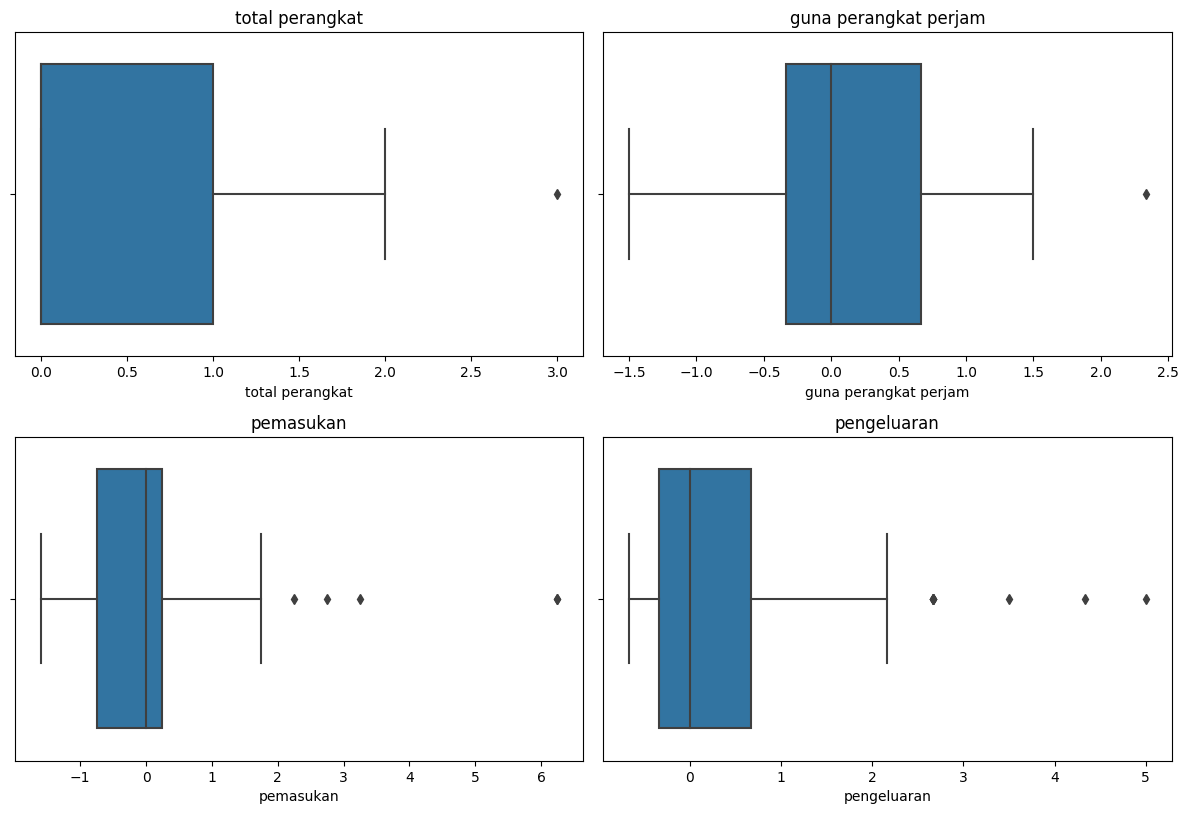

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

df = data[['total perangkat', 'guna perangkat perjam', 'pemasukan', 'pengeluaran']]
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        sns.boxplot(x=df.columns[i], data=df, ax=ax)
        ax.set_title(df.columns[i])
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

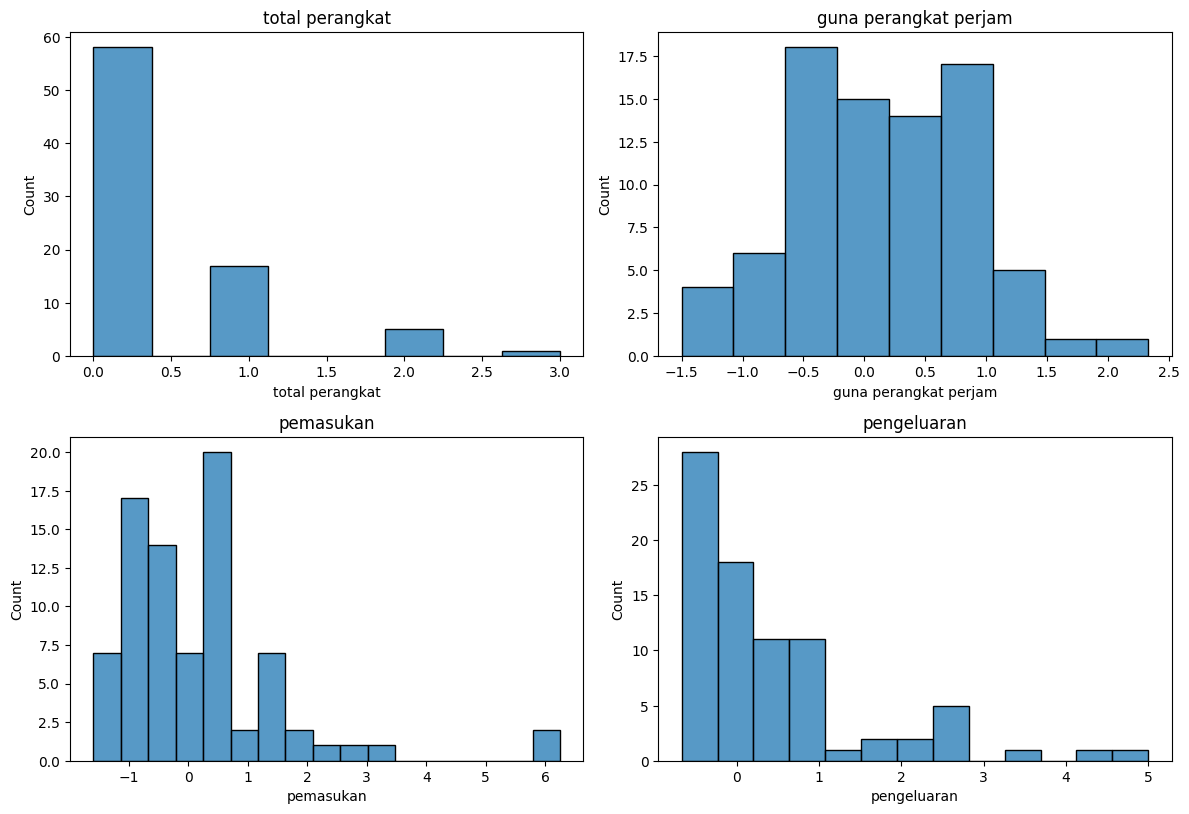

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        sns.histplot(x=df.columns[i], data=df, ax=ax)
        ax.set_title(df.columns[i])
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

## Percobaan Handling Outlier dan Pengecekan Data Imbalance

In [ ]:
# Penanganan outlier berdasarkan boxplot
df = data
df = df[df['total perangkat'] <= 4]
df = df[df['guna perangkat perjam'] < 20]
df = df[df['pemasukan'] < 2]
df = df[df['pengeluaran'] <  2.5]
df

,jenis aplikasi,aplikasi favorit,premium,genre musik,musik saat belajar,Keduanya,Laptop/Komputer,Smartphone/Tablet,tingkat mendengar,total perangkat,guna perangkat perjam,pemasukan,pengeluaran
0,"Spotify, Youtube Music",Spotify,0,"Jazz, Rock, J-Pop, Western, Techno",0,1,0,0,-2.0,0.0,-0.666667,-0.50,-0.500000
1,Spotify,Spotify,1,"Rock, Hip Hop, J-Pop",1,1,0,0,0.0,2.0,-0.666667,0.25,0.166667
2,Spotify,Spotify,0,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae",1,0,1,0,-1.0,0.0,0.000000,-0.75,0.000000
3,Spotify,Spotify,1,"K-Pop, J-Pop, Western",1,1,0,0,0.0,0.0,-0.333333,-0.25,1.000000
4,Youtube Music,Youtube Music,0,"Jazz, RnB, Klasik, Western",1,0,1,0,-3.0,0.0,-0.333333,-0.15,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Spotify,Spotify,1,"Pop, Jazz, Klasik, Hip Hop, K-Pop, Western, Re...",1,1,0,0,0.0,0.0,0.000000,-1.25,-0.550000
77,Youtube Music,Youtube Music,0,"Klasik, Tradisional",1,0,1,0,-1.0,0.0,-1.166667,-0.85,2.166667
78,Spotify,Spotify,1,"Pop, Jazz, Klasik, Hip Hop",1,0,1,0,0.0,0.0,0.666667,1.25,1.000000
79,Spotify,Spotify,0,"Pop, Jazz, Klasik, Rock, Western, Country, Retro",1,1,0,0,0.0,0.0,0.333333,-0.55,0.000000


<Axes: >

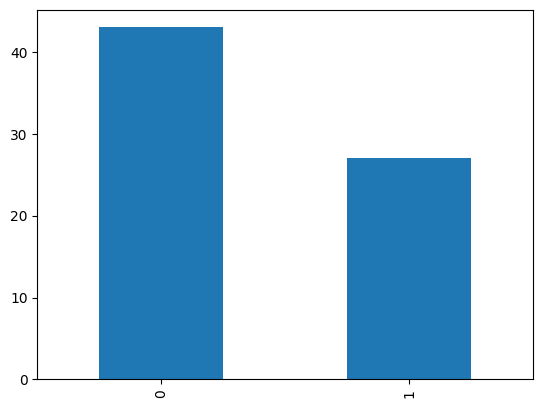

In [ ]:
# Pengecekan Imbalance Data Dengan Penanganan Outlier
df['premium'].value_counts().plot(kind='bar')

<Axes: >

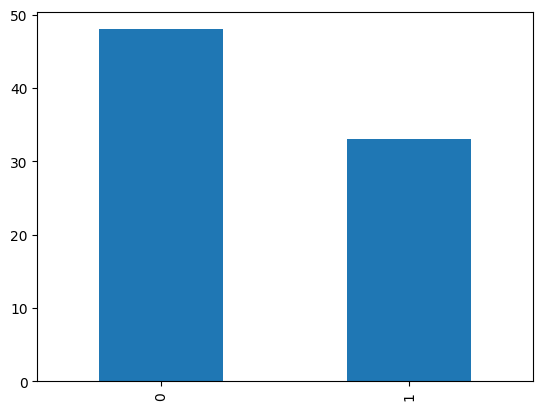

In [ ]:
# Pengecekan Imbalance Data Tanpa Penanganan Outlier
data['premium'].value_counts().plot(kind='bar')

## Feature Selection Melalui Korelasi

In [ ]:
# Threshold: +- 0.1
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,premium,musik saat belajar,Keduanya,Laptop/Komputer,Smartphone/Tablet,tingkat mendengar,total perangkat,guna perangkat perjam,pemasukan,pengeluaran
premium,1.00,0.18,0.24,-0.22,-0.08,0.43,0.11,-0.04,0.25,0.18
musik saat belajar,0.18,1.00,-0.01,0.11,-0.13,0.47,0.06,0.12,-0.13,0.08
Keduanya,0.24,-0.01,1.00,-0.79,-0.49,0.20,0.19,0.02,-0.04,-0.06
Laptop/Komputer,-0.22,0.11,-0.79,1.00,-0.15,-0.18,-0.23,-0.02,0.09,0.10
Smartphone/Tablet,-0.08,-0.13,-0.49,-0.15,1.00,-0.08,0.03,-0.01,-0.06,-0.05
tingkat mendengar,0.43,0.47,0.20,-0.18,-0.08,1.00,0.07,0.14,-0.04,0.12
total perangkat,0.11,0.06,0.19,-0.23,0.03,0.07,1.00,-0.11,-0.03,0.07
guna perangkat perjam,-0.04,0.12,0.02,-0.02,-0.01,0.14,-0.11,1.00,0.04,-0.04
pemasukan,0.25,-0.13,-0.04,0.09,-0.06,-0.04,-0.03,0.04,1.00,0.26
pengeluaran,0.18,0.08,-0.06,0.10,-0.05,0.12,0.07,-0.04,0.26,1.00


In [ ]:
# Penghapusan fitur/atribut diluar threshold
datfix = data.drop(['Smartphone/Tablet','guna perangkat perjam','genre musik','jenis aplikasi', 'aplikasi favorit'], axis =1)

## Partisi Data 10-Fold Cross Validation

In [ ]:
#define the 10-fold cross validation
# from sklearn.model_selection import KFold
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

# Data Modelling dan Evaluasi Model

## Tanpa Menangani Imbalance

In [ ]:
# Pemisahan atribut prediktor dan respons
x_cv = datfix.drop(["premium"], axis = 1)
y_cv = datfix["premium"]

In [ ]:
# Pemodelan data dengan partisi 10-fold cross-val, beserta evaluasinya
models = [GaussianNB(), DecisionTreeClassifier(random_state=42),
          LogisticRegression(random_state=42),SVC(random_state=42),
          RandomForestClassifier(random_state=50), KNeighborsClassifier()]
names = ["Naive Bayes", "Decision Tree","Logistic Regression", "SVM", "Random Forest", "KNN"]
Summary_imbalanced = pd.DataFrame(columns=["Models", "Accuracy", "Precision", "Recall", "F1"])
for model, name in zip(models, names):
    a = [name]
    for score in ["accuracy","precision","recall","f1"]:
        c = cross_val_score(model, x_cv, y_cv, scoring=score, cv=10).mean()
        a.append(c)
    Summary_imbalanced.loc[len(Summary_imbalanced)] = a
Summary_imbalanced

,Models,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.629167,0.551667,0.733333,0.621825
1,Decision Tree,0.630556,0.615000,0.508333,0.524762
2,Logistic Regression,0.704167,0.686667,0.650000,0.643571
3,SVM,0.716667,0.718333,0.608333,0.632619
4,Random Forest,0.769444,0.793333,0.708333,0.710000
5,KNN,0.666667,0.636667,0.600000,0.589524


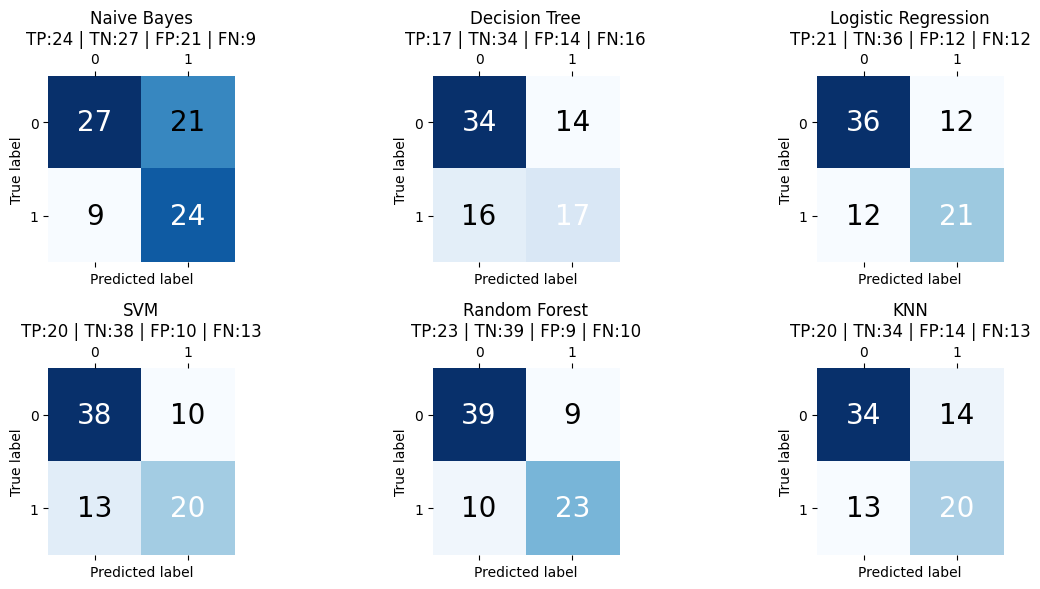

In [ ]:
# Visualisasi Confusion Matrix dari Model Klasifikasi
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# import numpy as np

y_pred1 = cross_val_predict(GaussianNB(), x_cv, y_cv, cv=10)
y_pred2 = cross_val_predict(DecisionTreeClassifier(random_state=42), x_cv, y_cv, cv=10)
y_pred3 = cross_val_predict(LogisticRegression(random_state=42), x_cv, y_cv, cv=10)
y_pred4 = cross_val_predict(SVC(random_state=42), x_cv, y_cv, cv=10)
y_pred5 = cross_val_predict(RandomForestClassifier(random_state=50), x_cv, y_cv, cv=10)
y_pred6 = cross_val_predict(KNeighborsClassifier(), x_cv, y_cv, cv=10)

cm1 = confusion_matrix(y_cv, y_pred1)
cm2 = confusion_matrix(y_cv, y_pred2)
cm3 = confusion_matrix(y_cv, y_pred3)
cm4 = confusion_matrix(y_cv, y_pred4)
cm5 = confusion_matrix(y_cv, y_pred5)
cm6 = confusion_matrix(y_cv, y_pred6)

def plot_confusion_matrix(ax, cm, name):
    ax.matshow(cm, cmap=plt.cm.Blues)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(name +'\nTP:{} | TN:{} | FP:{} | FN:{}'.format(
        cm[1,1], cm[0,0], cm[0,1], cm[1,0]))
    ax.text(0, 0, cm[0,0], ha='center', va='center', fontsize=20, color='white')
    ax.text(1, 0, cm[0,1], ha='center', va='center', fontsize=20, color='black')
    ax.text(0, 1, cm[1,0], ha='center', va='center', fontsize=20, color='black')
    ax.text(1, 1, cm[1,1], ha='center', va='center', fontsize=20, color='white')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plot_confusion_matrix(axes[0,0], cm1, "Naive Bayes")
plot_confusion_matrix(axes[0,1], cm2, "Decision Tree")
plot_confusion_matrix(axes[0,2], cm3, "Logistic Regression")
plot_confusion_matrix(axes[1,0], cm4, "SVM")
plot_confusion_matrix(axes[1,1], cm5, "Random Forest")
plot_confusion_matrix(axes[1,2], cm6, "KNN")

plt.tight_layout()
plt.show()

## Dengan Data Balance

In [ ]:
# Pemisahan atribut prediktor dan respons
yimb = datfix["premium"]
ximb = datfix.drop("premium", axis=1)

### Metode SMOTE

In [ ]:
#import library untuk teknik SMOTE
from imblearn.over_sampling import SMOTE
#melakukan teknik untuk mengatasi imbalanced data dengan SMOTE
oversample = SMOTE(random_state=42)
oversampled_X,oversampled_Y = oversample.fit_resample(ximb,yimb)

In [ ]:
#menampilkan hasil SMOTE
oversampled = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)
oversampled

,musik saat belajar,Keduanya,Laptop/Komputer,tingkat mendengar,total perangkat,pemasukan,pengeluaran,premium
0,0,1,0,-2.0,0.000000,-0.500000,-0.500000,0
1,1,1,0,0.0,2.000000,0.250000,0.166667,1
2,1,0,1,-1.0,0.000000,-0.750000,0.000000,0
3,1,1,0,0.0,0.000000,-0.250000,1.000000,1
4,1,0,1,-3.0,0.000000,-0.150000,0.000000,0
...,...,...,...,...,...,...,...,...
91,1,1,0,0.0,0.000000,-0.055926,-0.571765,1
92,1,1,0,0.0,2.721012,-0.864038,0.573671,1
93,1,1,0,0.0,0.000000,0.103928,0.528096,1
94,1,1,0,0.0,0.000000,-0.883638,-0.559159,1


In [ ]:
# Split data into input and output variables
x_smote = oversampled.iloc[:, :-1].values
y_smote = oversampled.iloc[:, -1].values
# Define the k-fold cross validation method
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
modelsmote = [GaussianNB(), DecisionTreeClassifier(random_state=42),
              LogisticRegression(random_state=42),SVC(random_state=42),
              RandomForestClassifier(random_state=50), KNeighborsClassifier()]
names = ["Naive Bayes", "Decision Tree","Logistic Regression", "SVM", "Random Forest", "KNN"]
Summary_smote = pd.DataFrame(columns=["Models", "Accuracy", "Precision", "Recall", "F1"])
for model, name in zip(modelsmote, names):
    a = [name]
    for score in ["accuracy","precision","recall","f1"]:
        c = cross_val_score(model, x_smote, y_smote, scoring=score, cv=10).mean()
        a.append(c)
    Summary_smote.loc[len(Summary_smote)] = a
Summary_smote

,Models,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.698889,0.686190,0.775,0.719654
1,Decision Tree,0.716667,0.776667,0.660,0.687727
2,Logistic Regression,0.771111,0.764048,0.840,0.789192
3,SVM,0.727778,0.722143,0.820,0.753939
4,Random Forest,0.788889,0.803333,0.810,0.800058
5,KNN,0.696667,0.694524,0.795,0.729444


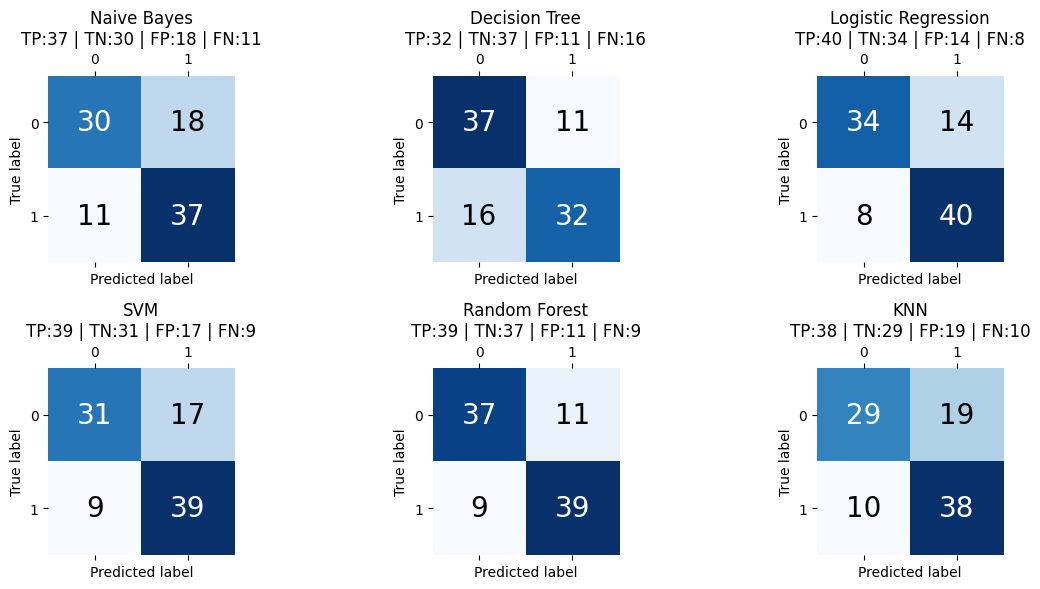

In [ ]:
y_ospred1 = cross_val_predict(GaussianNB(), x_smote, y_smote, cv=10)
y_ospred2 = cross_val_predict(DecisionTreeClassifier(random_state=42),  x_smote, y_smote, cv=10)
y_ospred3 = cross_val_predict(LogisticRegression(random_state=42),  x_smote, y_smote, cv=10)
y_ospred4 = cross_val_predict(SVC(random_state=42),  x_smote, y_smote, cv=10)
y_ospred5 = cross_val_predict(RandomForestClassifier(random_state=50),  x_smote, y_smote, cv=10)
y_ospred6 = cross_val_predict(KNeighborsClassifier(),  x_smote, y_smote, cv=10)

cmos1 = confusion_matrix(y_smote, y_ospred1)
cmos2 = confusion_matrix(y_smote, y_ospred2)
cmos3 = confusion_matrix(y_smote, y_ospred3)
cmos4 = confusion_matrix(y_smote, y_ospred4)
cmos5 = confusion_matrix(y_smote, y_ospred5)
cmos6 = confusion_matrix(y_smote, y_ospred6)

def plot_confusion_matrix(ax, cm, name):
    ax.matshow(cm, cmap=plt.cm.Blues)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(name +'\nTP:{} | TN:{} | FP:{} | FN:{}'.format(
        cm[1,1], cm[0,0], cm[0,1], cm[1,0]))
    ax.text(0, 0, cm[0,0], ha='center', va='center', fontsize=20, color='white')
    ax.text(1, 0, cm[0,1], ha='center', va='center', fontsize=20, color='black')
    ax.text(0, 1, cm[1,0], ha='center', va='center', fontsize=20, color='black')
    ax.text(1, 1, cm[1,1], ha='center', va='center', fontsize=20, color='white')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plot_confusion_matrix(axes[0,0], cmos1, "Naive Bayes")
plot_confusion_matrix(axes[0,1], cmos2, "Decision Tree")
plot_confusion_matrix(axes[0,2], cmos3, "Logistic Regression")
plot_confusion_matrix(axes[1,0], cmos4, "SVM")
plot_confusion_matrix(axes[1,1], cmos5, "Random Forest")
plot_confusion_matrix(axes[1,2], cmos6, "KNN")

plt.tight_layout()
plt.show()

### Random Over Sampling (ROS)

In [ ]:
#Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(ximb,yimb)

print('Original dataset shape', Counter(yimb))
print('Resample ROS dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 48, 1: 33})
Resample ROS dataset shape Counter({0: 48, 1: 48})


In [ ]:
modelros = [GaussianNB(), DecisionTreeClassifier(random_state=42),
            LogisticRegression(random_state=42),SVC(random_state=42),
            RandomForestClassifier(random_state=50), KNeighborsClassifier()]
names = ["Naive Bayes", "Decision Tree","Logistic Regression", "SVM", "Random Forest","KNN"]
Summary_ros = pd.DataFrame(columns=["Models", "Accuracy", "Precision", "Recall", "F1"])
for model, name in zip(modelros, names):
    a = [name]
    for score in ["accuracy","precision","recall","f1"]:
        c = cross_val_score(model, x_ros, y_ros, scoring=score, cv=10).mean()
        a.append(c)
    Summary_ros.loc[len(Summary_ros)] = a
Summary_ros

,Models,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.646667,0.619405,0.775,0.683741
1,Decision Tree,0.750000,0.767500,0.785,0.741570
2,Logistic Regression,0.737778,0.747976,0.795,0.756375
3,SVM,0.737778,0.746905,0.800,0.760505
4,Random Forest,0.833333,0.827857,0.875,0.838846
5,KNN,0.706667,0.701905,0.775,0.726616


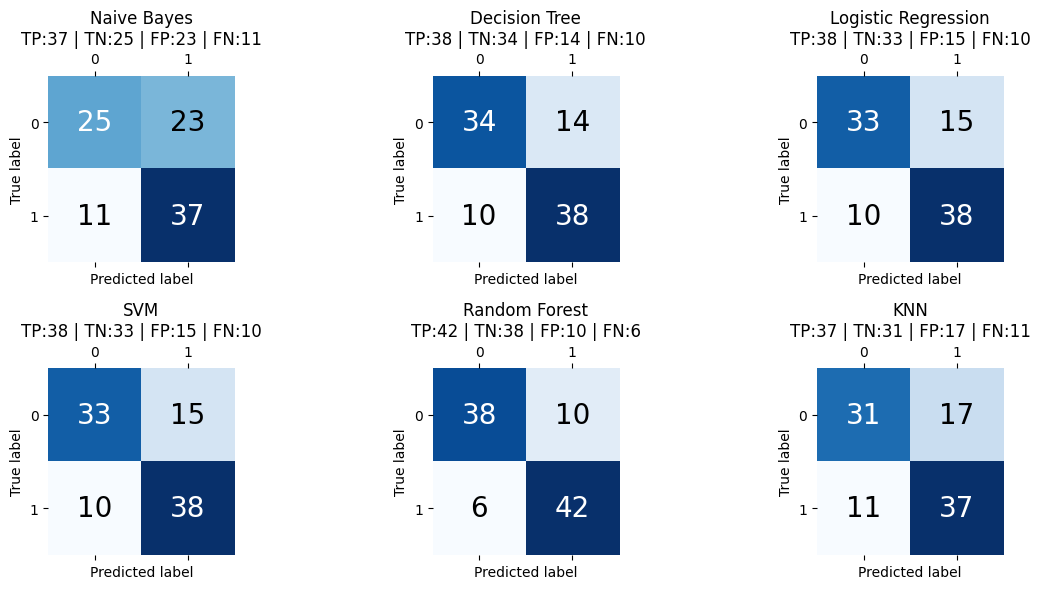

In [ ]:
y_rospred1 = cross_val_predict(GaussianNB(), x_ros, y_ros, cv=10)
y_rospred2 = cross_val_predict(DecisionTreeClassifier(random_state=42), x_ros, y_ros, cv=10)
y_rospred3 = cross_val_predict(LogisticRegression(random_state=42),  x_ros, y_ros, cv=10)
y_rospred4 = cross_val_predict(SVC(random_state=42), x_ros, y_ros, cv=10)
y_rospred5 = cross_val_predict(RandomForestClassifier(random_state=50), x_ros, y_ros, cv=10)
y_rospred6 = cross_val_predict(KNeighborsClassifier(),  x_ros, y_ros, cv=10)

cmros1 = confusion_matrix(y_ros, y_rospred1)
cmros2 = confusion_matrix(y_ros, y_rospred2)
cmros3 = confusion_matrix(y_ros, y_rospred3)
cmros4 = confusion_matrix(y_ros, y_rospred4)
cmros5 = confusion_matrix(y_ros, y_rospred5)
cmros6 = confusion_matrix(y_ros, y_rospred6)

def plot_confusion_matrix(ax, cm, name):
    ax.matshow(cm, cmap=plt.cm.Blues)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(name +'\nTP:{} | TN:{} | FP:{} | FN:{}'.format(
        cm[1,1], cm[0,0], cm[0,1], cm[1,0]))
    ax.text(0, 0, cm[0,0], ha='center', va='center', fontsize=20, color='white')
    ax.text(1, 0, cm[0,1], ha='center', va='center', fontsize=20, color='black')
    ax.text(0, 1, cm[1,0], ha='center', va='center', fontsize=20, color='black')
    ax.text(1, 1, cm[1,1], ha='center', va='center', fontsize=20, color='white')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plot_confusion_matrix(axes[0,0], cmros1, "Naive Bayes")
plot_confusion_matrix(axes[0,1], cmros2, "Decision Tree")
plot_confusion_matrix(axes[0,2], cmros3, "Logistic Regression")
plot_confusion_matrix(axes[1,0], cmros4, "SVM")
plot_confusion_matrix(axes[1,1], cmros5, "Random Forest")
plot_confusion_matrix(axes[1,2], cmros6, "KNN")

plt.tight_layout()
plt.show()

### Random Under Sampling (RUS)

In [ ]:
#Random Under Sampling
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(ximb,yimb)

print('Original dataset shape', Counter(yimb))
print('Resample RUS dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 48, 1: 33})
Resample RUS dataset shape Counter({0: 33, 1: 33})


In [ ]:
modelrus = [GaussianNB(), DecisionTreeClassifier(random_state=42),
          LogisticRegression(random_state=42),SVC(random_state=42),
          RandomForestClassifier(random_state=50), KNeighborsClassifier()]
names = ["Naive Bayes", "Decision Tree","Logistic Regression", "SVM", "Random Forest", "KNN"]
Summary_rus = pd.DataFrame(columns=["Models", "Accuracy", "Precision", "Recall", "F1"])
for model, name in zip(modelrus, names):
    a = [name]
    for score in ["accuracy","precision","recall","f1"]:
        c = cross_val_score(model, x_rus, y_rus, scoring=score, cv=10).mean()
        a.append(c)
    Summary_rus.loc[len(Summary_rus)] = a
Summary_rus

,Models,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.704762,0.733333,0.708333,0.691032
1,Decision Tree,0.654762,0.596667,0.650000,0.607937
2,Logistic Regression,0.726190,0.701667,0.683333,0.682619
3,SVM,0.645238,0.618333,0.716667,0.643333
4,Random Forest,0.695238,0.690000,0.708333,0.680079
5,KNN,0.650000,0.643333,0.750000,0.672619


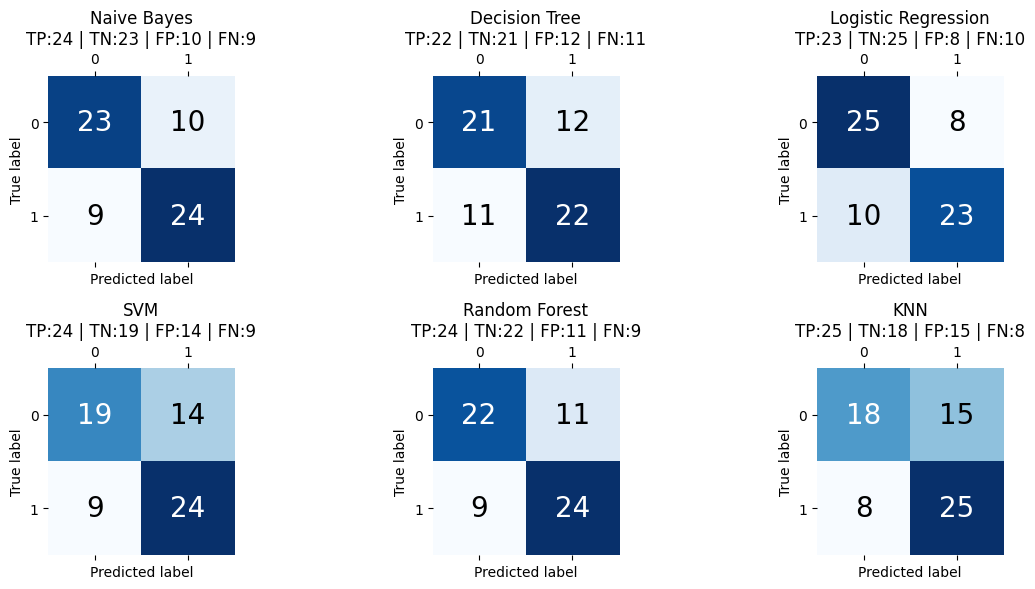

In [ ]:
y_ruspred1 = cross_val_predict(GaussianNB(), x_rus, y_rus, cv=10)
y_ruspred2 = cross_val_predict(DecisionTreeClassifier(random_state=42), x_rus, y_rus, cv=10)
y_ruspred3 = cross_val_predict(LogisticRegression(random_state=42),x_rus, y_rus, cv=10)
y_ruspred4 = cross_val_predict(SVC(random_state=42), x_rus, y_rus, cv=10)
y_ruspred5 = cross_val_predict(RandomForestClassifier(random_state=50), x_rus, y_rus, cv=10)
y_ruspred6 = cross_val_predict(KNeighborsClassifier(),x_rus, y_rus, cv=10)

cmrus1 = confusion_matrix(y_rus, y_ruspred1)
cmrus2 = confusion_matrix(y_rus, y_ruspred2)
cmrus3 = confusion_matrix(y_rus, y_ruspred3)
cmrus4 = confusion_matrix(y_rus, y_ruspred4)
cmrus5 = confusion_matrix(y_rus, y_ruspred5)
cmrus6 = confusion_matrix(y_rus, y_ruspred6)

def plot_confusion_matrix(ax, cm, name):
    ax.matshow(cm, cmap=plt.cm.Blues)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(name +'\nTP:{} | TN:{} | FP:{} | FN:{}'.format(
        cm[1,1], cm[0,0], cm[0,1], cm[1,0]))
    ax.text(0, 0, cm[0,0], ha='center', va='center', fontsize=20, color='white')
    ax.text(1, 0, cm[0,1], ha='center', va='center', fontsize=20, color='black')
    ax.text(0, 1, cm[1,0], ha='center', va='center', fontsize=20, color='black')
    ax.text(1, 1, cm[1,1], ha='center', va='center', fontsize=20, color='white')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plot_confusion_matrix(axes[0,0], cmrus1, "Naive Bayes")
plot_confusion_matrix(axes[0,1], cmrus2, "Decision Tree")
plot_confusion_matrix(axes[0,2], cmrus3, "Logistic Regression")
plot_confusion_matrix(axes[1,0], cmrus4, "SVM")
plot_confusion_matrix(axes[1,1], cmrus5, "Random Forest")
plot_confusion_matrix(axes[1,2], cmrus6, "KNN")

plt.tight_layout()
plt.show()

#Visualisasi Evaluasi Model

In [ ]:
Summary_imbalanced
Summary_smote
Summary_ros
Summary_rus

,Models,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.704762,0.733333,0.708333,0.691032
1,Decision Tree,0.654762,0.596667,0.650000,0.607937
2,Logistic Regression,0.726190,0.701667,0.683333,0.682619
3,SVM,0.645238,0.618333,0.716667,0.643333
4,Random Forest,0.695238,0.690000,0.708333,0.680079
5,KNN,0.650000,0.643333,0.750000,0.672619


In [ ]:
summaries = [Summary_imbalanced, Summary_smote, Summary_ros, Summary_rus]
metrics = ["Accuracy", "Precision", "Recall", "F1"]
bar_metric = pd.DataFrame({"Penanganan": ["Imbalance"]*6 + ["SMOTE"]*6 + ["ROS"]*6 + ["RUS"]*6,
                           "Model": ["NB", "DT", "LR", "SVM", "RF", "KNN"]*4})

In [ ]:
for metrik in metrics:
  metric_val = []
  for mod_sum in summaries:
    for clf_mod in range(6):
      persentase = round((mod_sum[metrik][clf_mod])*100, 2)
      metric_val.append(persentase)
  bar_metric[metrik] = metric_val

kiri = [0, 0, 1, 1]
kanan = [0, 1, 0, 1]

Text(0.5, 0.98, 'Akurasi Model')

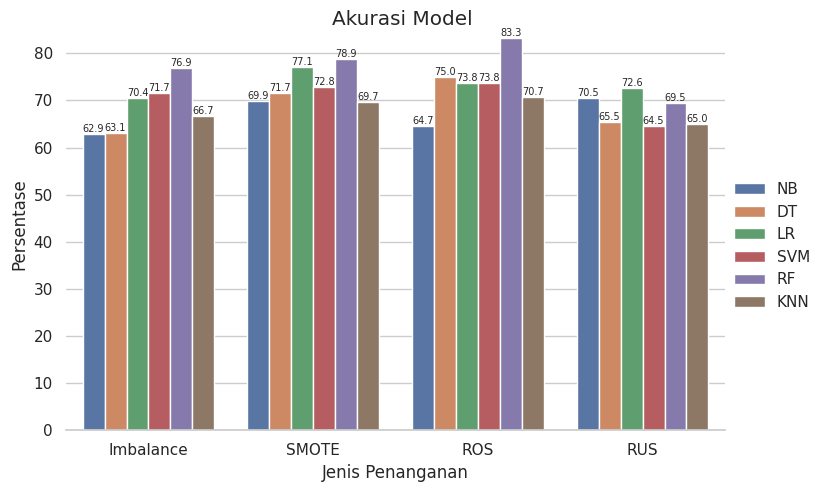

In [ ]:
#untuk akurasi
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=bar_metric, kind="bar",
    x="Penanganan", y="Accuracy", hue="Model", height = 5, aspect = 1.5
)
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', size=7)
g.despine(left=True)
g.set_axis_labels("Jenis Penanganan", "Persentase")
g.legend.set_title("")
g.fig.suptitle("Akurasi Model")

Text(0.5, 0.98, 'Presisi Model')

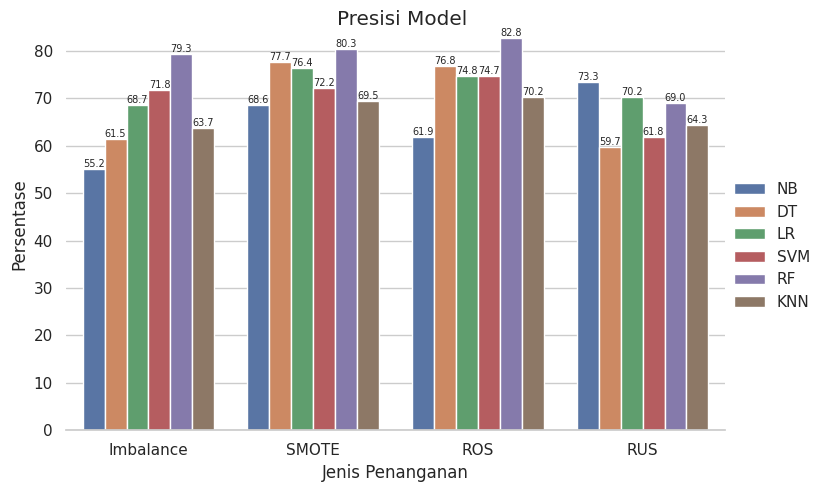

In [ ]:
#untuk presisi
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=bar_metric, kind="bar",
    x="Penanganan", y="Precision", hue="Model",  height = 5, aspect = 1.5
)
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', size=7)

g.despine(left=True)
g.set_axis_labels("Jenis Penanganan", "Persentase")
g.legend.set_title("")
g.fig.suptitle("Presisi Model")

Text(0.5, 0.98, 'Recall Model')

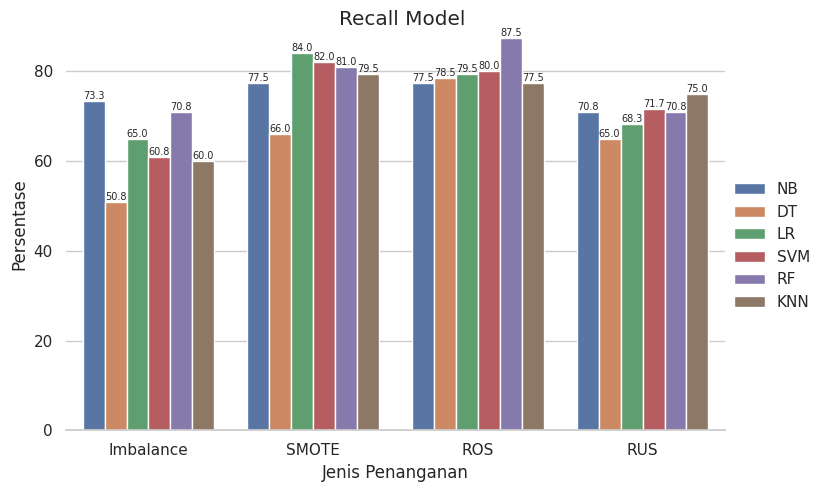

In [ ]:
#untuk recall

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=bar_metric, kind="bar",
    x="Penanganan", y="Recall", hue="Model", height = 5, aspect = 1.5
)
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', size=7)
g.despine(left=True)
g.set_axis_labels("Jenis Penanganan", "Persentase")
g.legend.set_title("")
g.fig.suptitle("Recall Model")

Text(0.5, 0.98, 'F1 Model')

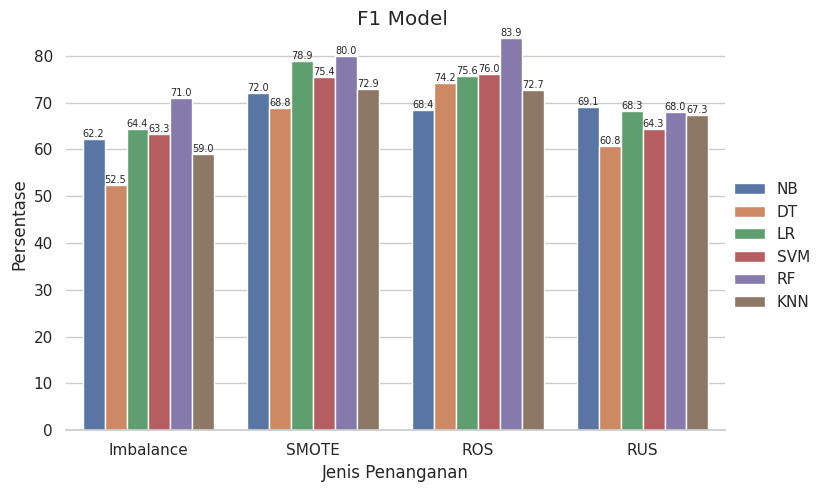

In [ ]:
#untuk f1

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=bar_metric, kind="bar",
    x="Penanganan", y="F1", hue="Model", height = 5, aspect = 1.5
)
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', size=7)
g.despine(left=True)
g.set_axis_labels("Jenis Penanganan", "Persentase")
g.legend.set_title("")
g.fig.suptitle("F1 Model")

In [ ]:
#Visualisasi K-fold untuk model random forest

line_accu_part = pd.DataFrame()
handling_x = [x_cv, x_smote, x_ros, x_rus]
handling_y = [y_cv, y_smote, y_ros, y_rus]
penanganan = ["Imbalance", "SMOTE", "ROS", "RUS"]

for i in range(len(handling_x)):
  curr_val = cross_val_score(RandomForestClassifier(random_state=50),
                             handling_x[i], handling_y[i], cv=10)
  line_accu_part[penanganan[i]] = [round((x*100),2) for x in curr_val]
line_accu_part

,Imbalance,SMOTE,ROS,RUS
0,44.44,80.00,70.00,57.14
1,75.00,90.00,90.00,57.14
2,87.50,100.00,100.00,71.43
3,87.50,100.00,100.00,85.71
4,75.00,70.00,80.00,85.71
5,75.00,60.00,60.00,71.43
6,100.00,88.89,88.89,66.67
7,50.00,55.56,77.78,50.00
8,87.50,66.67,77.78,83.33
9,87.50,77.78,88.89,66.67


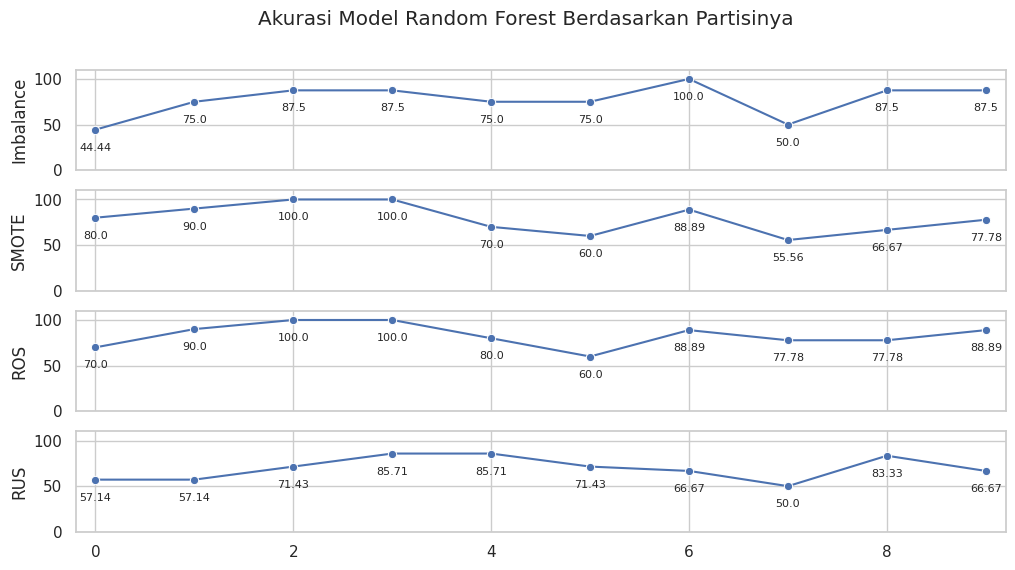

In [ ]:
# Assuming you have a list of dataframes called 'dfs'
dfs = ["Imbalance", "SMOTE",
       "ROS", "RUS"]  # Replace with your actual dataframes

# Create subplots
fig, axes = plt.subplots(len(dfs), 1, figsize=(12,6), sharex=True)
plt.xlim(-0.2, 9.2)
fig.suptitle("Akurasi Model Random Forest Berdasarkan Partisinya")

# Iterate over each dataframe and plot the line plot with data labels
for i, df in enumerate(dfs):
    ax = axes[i]  # Get the current axis

    # Create the line plot using seaborn
    sns.lineplot(data=line_accu_part[df], ax=ax, marker="o").set(ylim=(0,110))

    # Add data labels to each point
    for j, value in enumerate(line_accu_part[df]):
        ax.annotate(value, (j, value), textcoords="offset points",
                    fontsize=8, xytext=(0, -15), ha='center')

# Display the plot
plt.show()

#Model Akhir

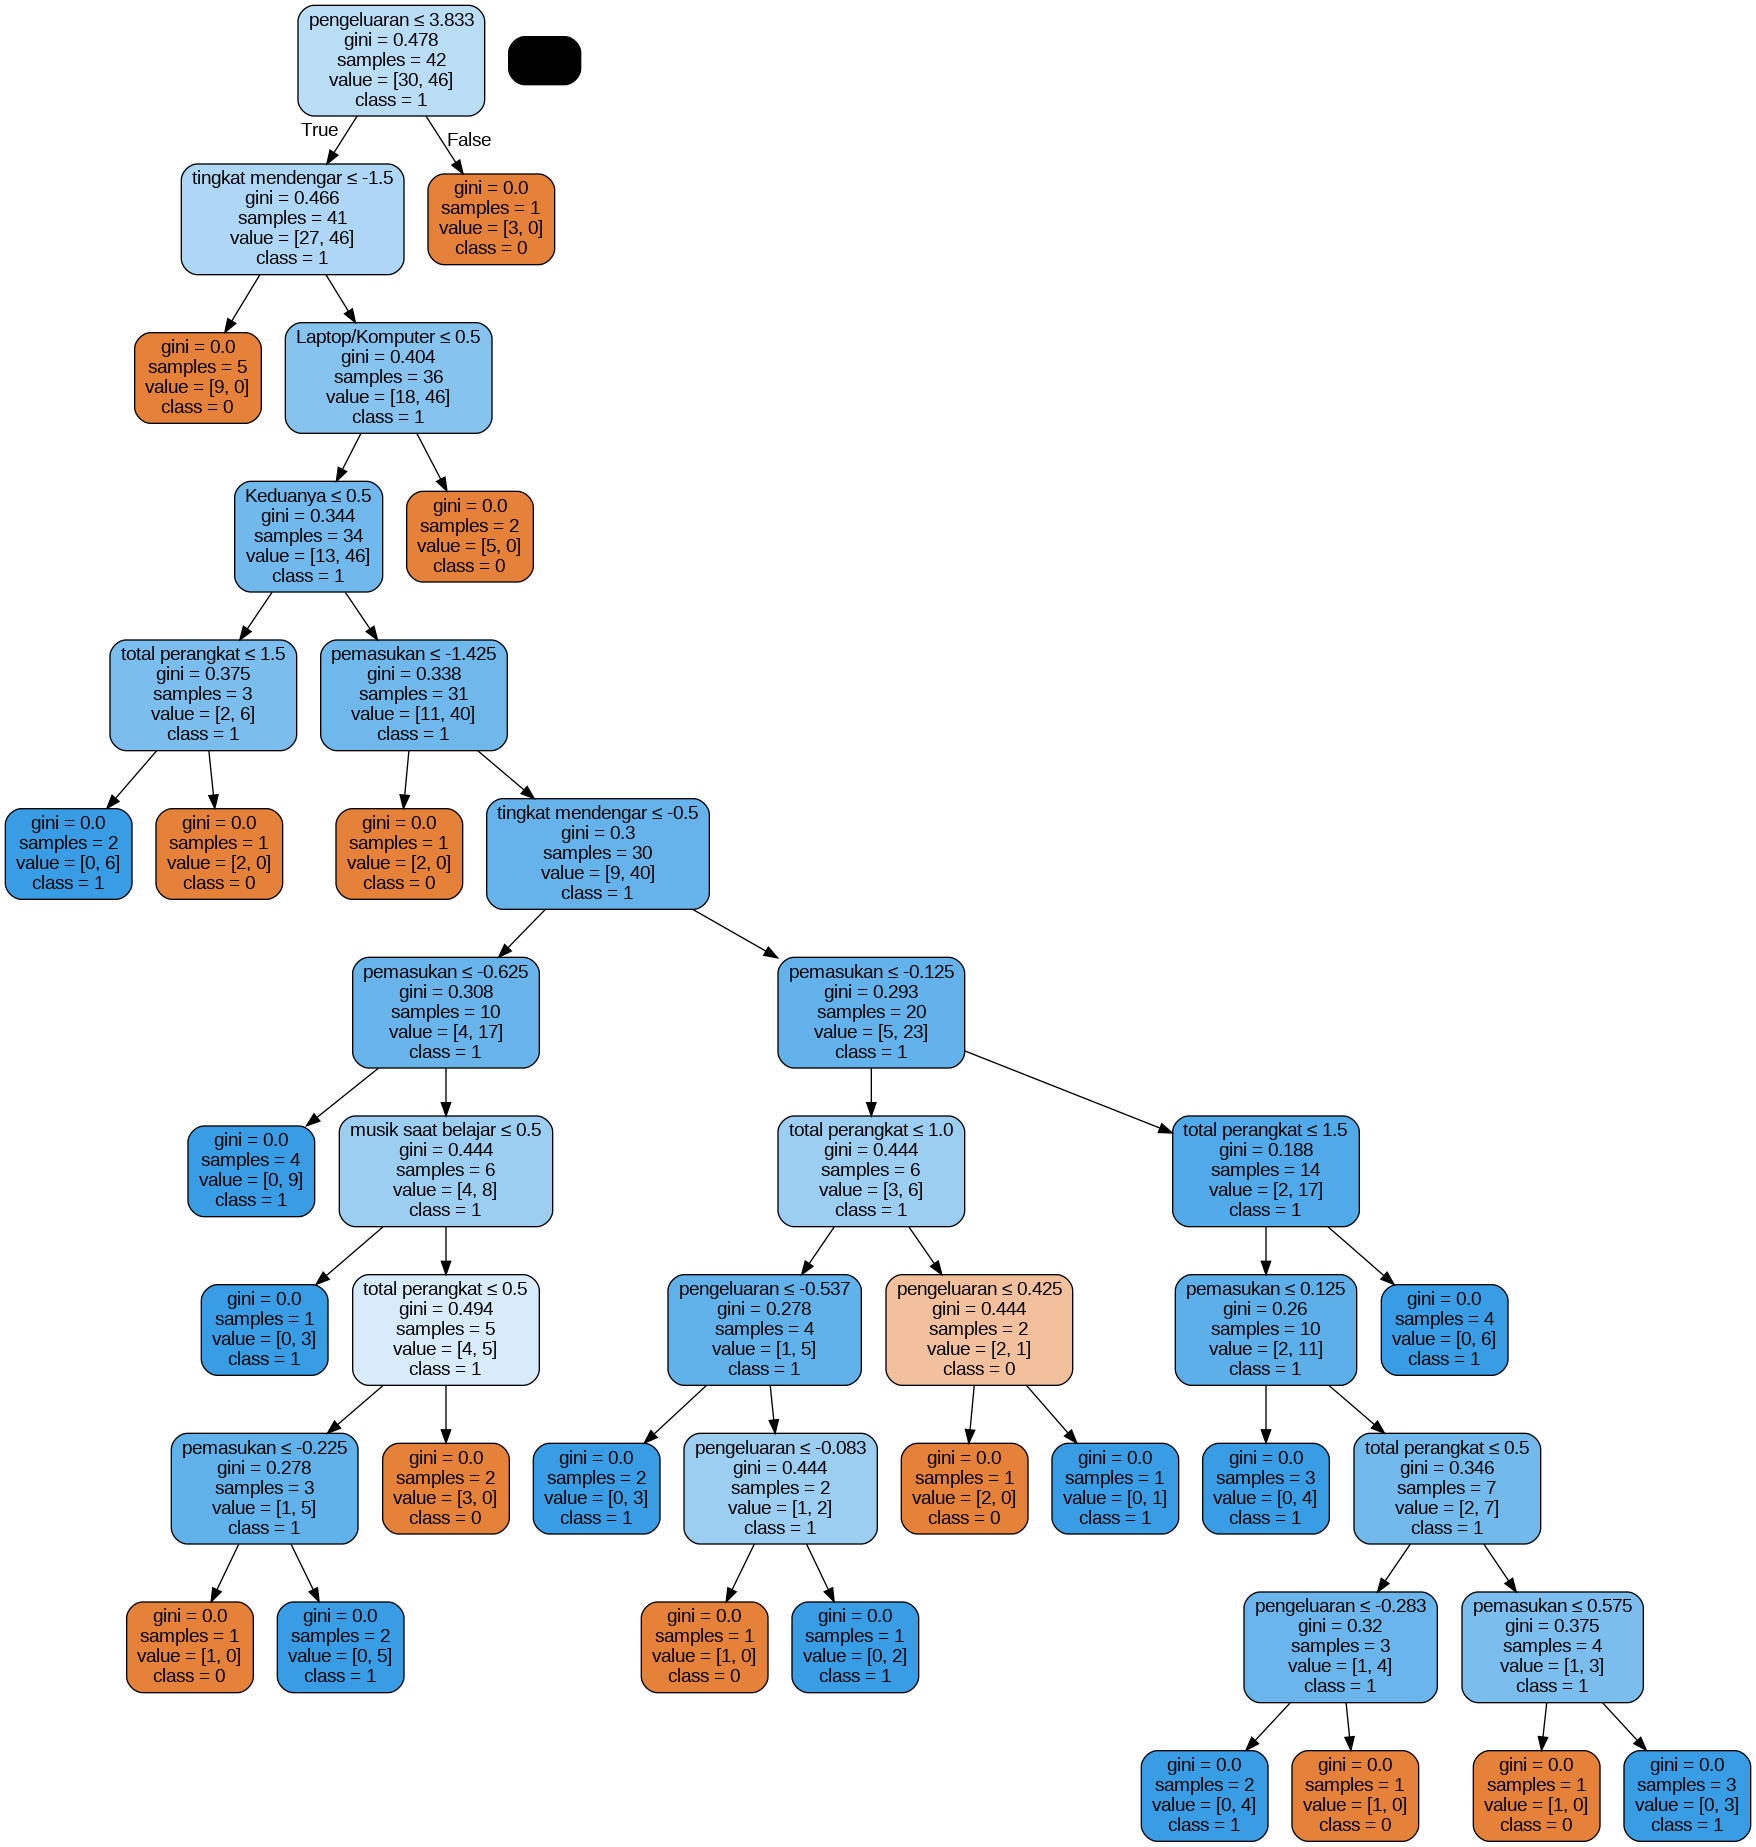

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=50)

# Create and fit Random Forest model
rf = RandomForestClassifier(n_estimators=10, random_state=50)
rf.fit(X_train, y_train)

# Export one of the decision trees from the Random Forest
tree_index = 3  # Index of the tree to export (change it according to your needs)

dot_data = StringIO()
export_graphviz(rf.estimators_[tree_index], out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("random_forest_tree.png")

# Display the exported decision tree
Image(graph.create_png())

In [ ]:
accuracy = rf.score(X_test, y_test)
accuracy

0.85

# Association Rules Mining

In [ ]:
data = pd.read_csv("DatminUAS.csv")
data = data[["Email Address", "Genre musik apa yang anda sukai?"]]
data.rename(columns={"Email Address": "Responden", "Genre musik apa yang anda sukai?": "Genre"}, inplace=True)
data

,Responden,Genre
0,dimyadi1123@gmail.com,"Jazz, Rock, J-Pop, Western, Techno"
1,farisimohammad2003@gmail.com,"Rock, Hip Hop, J-Pop"
2,achmad.mundir.wicaksono-2021@ftmm.unair.ac.id,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae"
3,janetha.maesha.purba-2021@ftmm.unair.ac.id,"K-Pop, J-Pop, Western"
4,christeigen.theodore.suhalim-2021@ftmm.unair.a...,"Jazz, RnB, Klasik, Western"
...,...,...
76,erwina.yolavania-2022@ftmm.unair.ac.id,"Pop, Jazz, Klasik, Hip Hop, K-Pop, Western, Re..."
77,herman.effendi-2022@ftmm.unair.ac.id,"Klasik, Tradisional"
78,elzandi.fan.zikra-2022@ftmm.unair.ac.id,"Pop, Jazz, Klasik, Hip Hop"
79,yusuf.eka.maulana-2022@ftmm.unair.ac.id,"Pop, Jazz, Klasik, Rock, Western, Country, Retro"


## Preprocessing

In [ ]:
data["const"] = 1
data.head()

,Responden,Genre,const
0,dimyadi1123@gmail.com,"Jazz, Rock, J-Pop, Western, Techno",1
1,farisimohammad2003@gmail.com,"Rock, Hip Hop, J-Pop",1
2,achmad.mundir.wicaksono-2021@ftmm.unair.ac.id,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae",1
3,janetha.maesha.purba-2021@ftmm.unair.ac.id,"K-Pop, J-Pop, Western",1
4,christeigen.theodore.suhalim-2021@ftmm.unair.a...,"Jazz, RnB, Klasik, Western",1


In [ ]:
for i in range(len(data)):
  curr = data.loc[i, "Responden"]
  data.loc[i, "Responden"] = curr[:curr.rfind("@")]
data.head()

,Responden,Genre,const
0,dimyadi1123,"Jazz, Rock, J-Pop, Western, Techno",1
1,farisimohammad2003,"Rock, Hip Hop, J-Pop",1
2,achmad.mundir.wicaksono-2021,"Jazz, Klasik, Dangdut, K-Pop, Western, Reggae",1
3,janetha.maesha.purba-2021,"K-Pop, J-Pop, Western",1
4,christeigen.theodore.suhalim-2021,"Jazz, RnB, Klasik, Western",1


In [ ]:
data["Genre"] = data["Genre"].str.split(", ")
data = data.explode("Genre")
data.head()

,Responden,Genre,const
0,dimyadi1123,Jazz,1
0,dimyadi1123,Rock,1
0,dimyadi1123,J-Pop,1
0,dimyadi1123,Western,1
0,dimyadi1123,Techno,1


In [ ]:
pivot_data = data.pivot_table(index='Responden', columns='Genre', values= 'const', aggfunc='sum').fillna(0)
pivot_data[pivot_data > 0] = 1
pivot_data

Genre,Country,Dangdut,Hip Hop,J-Pop,Jazz,K-Pop,Klasik,Pop,Reggae,Retro,RnB,Rock,Techno,Tradisional,Western
Responden,,,,,,,,,,,,,,,
achmad.mundir.wicaksono-2021,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
aditya.ananda-2021,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afif.ilham.halik-2021,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
albertus.antero.arnayusrandita-2021,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
alvina.nur.aulia-2020,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
viola.rosa.indah-2020,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
vivia.faustine.gunawan-2021,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
yohanes.manasye.triangga-2020,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Keterangan dari tabel pivot
print('Jumlah Responden :', pivot_data.shape[0])
print('Jumlah Genre :', pivot_data.shape[1])

Jumlah Responden : 81
Jumlah Genre : 15


## Frequent Itemset Generation

In [ ]:
freq = apriori(pivot_data, min_support= 0.25, use_colnames = True)
freq.sort_values('support',ascending=False).reset_index(drop=True)

,support,itemsets
0,0.641975,(Western)
1,0.493827,(K-Pop)
2,0.456790,(Jazz)
3,0.419753,(Klasik)
4,0.407407,(Pop)
5,0.407407,(RnB)
6,0.345679,"(K-Pop, Western)"
7,0.320988,"(Jazz, Western)"
8,0.296296,(Hip Hop)
9,0.296296,"(RnB, Western)"


## Association Rules Generation

In [ ]:
rules = association_rules(freq,metric='confidence',min_threshold=0.5)[['antecedents','consequents','support','confidence','lift']]
rules[rules['lift'] > 1].sort_values(by=['confidence', 'lift', 'support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(RnB),(Western),0.296296,0.727273,1.132867
1,(Jazz),(Western),0.320988,0.702703,1.094595
2,(K-Pop),(Western),0.345679,0.700000,1.090385
3,(RnB),(K-Pop),0.271605,0.666667,1.350000
4,(K-Pop),(RnB),0.271605,0.550000,1.350000
5,(Western),(K-Pop),0.345679,0.538462,1.090385
6,(Western),(Jazz),0.320988,0.500000,1.094595
